참고: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforestclassifier#sklearn.ensemble.RandomForestClassifier

## 아이리스 데이터 사용 실습예제-1

### 1. 데이터 불러오기

In [40]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings(action="ignore")

iris = datasets.load_iris()
print("아이리스 종류:", iris.target_names)
print("target: [0: setosa, 1: versicolor, 2: virginica]")
print("데이터 수:", len(iris.data))
print("데이터 열 이름:", iris.feature_names)

아이리스 종류: ['setosa' 'versicolor' 'virginica']
target: [0: setosa, 1: versicolor, 2: virginica]
데이터 수: 150
데이터 열 이름: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [10]:
data = pd.DataFrame({
    'sepal_length': iris.data[:, 0],
    'sepal_width': iris.data[:, 1],
    'petal_length': iris.data[:, 2],
    'petal_width': iris.data[:, 3],
    'species': iris.target
})
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
x = data.iloc[:, :-1]
y = data['species']

# 테스트 데이터: 30%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)
x_train.shape, x_test.shape

((105, 4), (45, 4))

In [22]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
32,5.2,4.1,1.5,0.1
52,6.9,3.1,4.9,1.5
70,5.9,3.2,4.8,1.8
121,5.6,2.8,4.9,2.0
144,6.7,3.3,5.7,2.5
...,...,...,...,...
113,5.7,2.5,5.0,2.0
64,5.6,2.9,3.6,1.3
15,5.7,4.4,1.5,0.4
125,7.2,3.2,6.0,1.8


In [23]:
x_test

,sepal_length,sepal_width,petal_length,petal_width
87,6.3,2.3,4.4,1.3
111,6.4,2.7,5.3,1.9
10,5.4,3.7,1.5,0.2
91,6.1,3.0,4.6,1.4
49,5.0,3.3,1.4,0.2
60,5.0,2.0,3.5,1.0
72,6.3,2.5,4.9,1.5
67,5.8,2.7,4.1,1.0
39,5.1,3.4,1.5,0.2
55,5.7,2.8,4.5,1.3


In [24]:
y_train

32     0
52     1
70     1
121    2
144    2
      ..
113    2
64     1
15     0
125    2
9      0
Name: species, Length: 105, dtype: int32

In [25]:
y_test

87     1
111    2
10     0
91     1
49     0
60     1
72     1
67     1
39     0
55     1
66     1
142    2
53     1
1      0
19     0
112    2
85     1
38     0
21     0
35     0
102    2
132    2
126    2
24     0
61     1
2      0
95     1
90     1
76     1
117    2
58     1
97     1
129    2
114    2
146    2
47     0
124    2
120    2
118    2
141    2
26     0
43     0
59     1
41     0
56     1
Name: species, dtype: int32

### 2. 학습 진행

In [12]:
forest = RandomForestClassifier(n_estimators=100)
forest

forest.fit(x_train, y_train)

# n_estimators: 의사결정트리 개수(T)를 의미. (default=10)

RandomForestClassifier()

### 3. 예측

In [26]:
y_pred = forest.predict(x_test)
print("예측 결과:\n", y_pred)
print("실제 값:\n", list(y_test))

예측 결과:
 [1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2 2 2 0 0 1 0 1]
실제 값:
 [1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2, 2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0, 1]


In [28]:
print("정확도:", metrics.accuracy_score(y_test, y_pred))

정확도: 1.0


### 4. 성능 평가 확인

- 분류 예측 모듈의 평가는 Accuracy뿐만 아니라 Precision, Recall도 많이 사용된다.

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

정확도: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### 5. max_feature확인

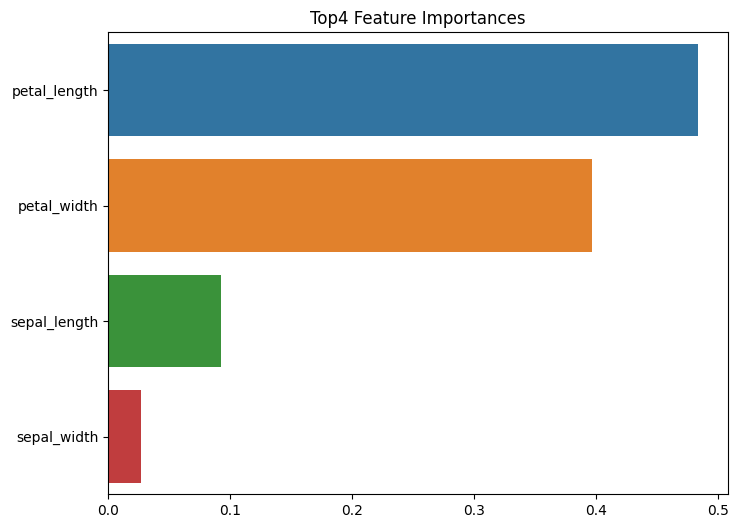

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances_values = forest.feature_importances_
feature_importances = pd.Series(feature_importances_values, index=x_train.columns)
feature_top4 = feature_importances.sort_values(ascending=False)[:4]

plt.figure(figsize=(8,6))
plt.title("Top4 Feature Importances")
sns.barplot(x=feature_top4, y=feature_top4.index)
plt.show()

### cf) GridSearchCV로 파라미터 조합 찾기

- n_estimators / max_features / max_depth / min_samples_leaf / min_samples_split

In [49]:
from sklearn.model_selection import GridSearchCV, KFold

estimator = RandomForestClassifier()
cv = KFold(n_splits=5, random_state=1, shuffle=True)
param = {
    'n_estimators': [2, 3, 4, 5],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5]
}

model = GridSearchCV(estimator=estimator, param_grid=param, cv=cv, verbose=-1, n_jobs=-1, refit=True)
model.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [2, 3, 4, 5]},
             verbose=-1)

In [50]:
print("Best Estimator:\n", model.best_estimator_,"\n")
print("Best Params:\n", model.best_params_,"\n")
print("Best Score:\n", model.best_score_,"\n")

Best Estimator:
 RandomForestClassifier(max_depth=5, max_features='log2', min_samples_leaf=4,
                       min_samples_split=3, n_estimators=5) 

Best Params:
 {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 5} 

Best Score:
 0.9714285714285715 



### Answer

In [45]:
from sklearn.model_selection import GridSearchCV, KFold

estimator = RandomForestClassifier()
cv = KFold(n_splits=5, random_state=1, shuffle=True)
param = {
    'n_estimators': [15, 17, 20, 22, 25, 27, 30, 33, 35, 37, 40],
    'max_features': [2, 3, 4],
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_leaf': [2, 3, 4, 5, 6, 7],
    'min_samples_split': [2, 3, 4, 5, 6, 7]
}

model = GridSearchCV(estimator=estimator, param_grid=param, cv=cv, verbose=-1, n_jobs=-1, refit=True)
model.fit(x_train, y_train)

print("Best Estimator:\n", model.best_estimator_,"\n")
print("Best Params:\n", model.best_params_,"\n")
print("Best Score:\n", model.best_score_,"\n")

Best Estimator:
 RandomForestClassifier(max_depth=2, max_features=2, min_samples_leaf=3,
                       n_estimators=22) 

Best Params:
 {'max_depth': 2, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 22} 

Best Score:
 0.9619047619047618 



---

## 유방암 데이터 사용 실습 예제-2

### 1. 데이터 불러오기

In [51]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

cancer = load_breast_cancer()
cancer.data.shape

(569, 30)

In [52]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

### 2. 훈련/테스트 세트로 나누기

In [53]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
X_train.shape, X_test.shape

((426, 30), (143, 30))

In [54]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [55]:
print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


### 3. 특성 중요도

In [56]:
print("특성 중요도: \n{}".format(forest.feature_importances_))

# max_depth를 사용하지 않아서 30개 데이터 모두 나옴
# 확률값이므로 중요도의 합은 1

특성 중요도: 
[0.02515433 0.01563844 0.05372655 0.04861645 0.00769078 0.00936994
 0.05539489 0.10305394 0.0065771  0.00282708 0.02921459 0.00607814
 0.01342868 0.03420174 0.00360641 0.00432096 0.00448775 0.00657502
 0.00460597 0.00627095 0.11657269 0.01603133 0.16027724 0.0634688
 0.01356448 0.01164113 0.03923725 0.11711756 0.01164259 0.00960721]


### 4. 특성 중요도 시각화하기

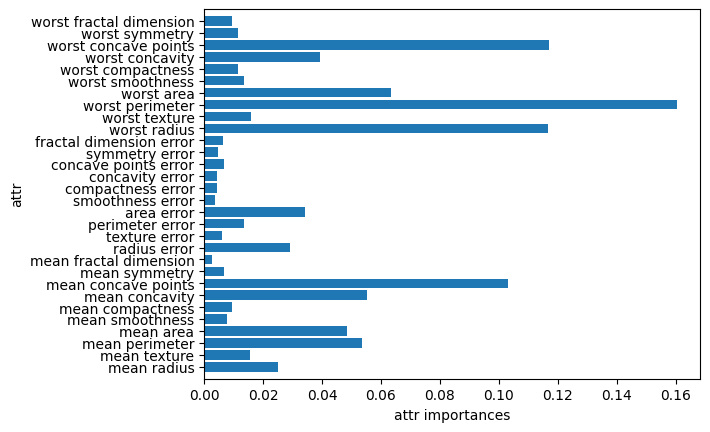

In [57]:
n_features = cancer.data.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("attr importances")
plt.ylabel("attr")
plt.ylim(-1, n_features)
plt.show()